C:\Users\hp\AppData\Local\Temp\ipykernel_5832\2291980143.py:11: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_df = pd.read_csv(aviation_data_path)


         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude  Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN        NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN        NaN          NaN   
2    Saltville, VA  United States  36.922223 -81.878056          NaN   
3       EUREKA, CA  United States        NaN        NaN          NaN   
4       Canton, OH  United States        NaN        NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1         

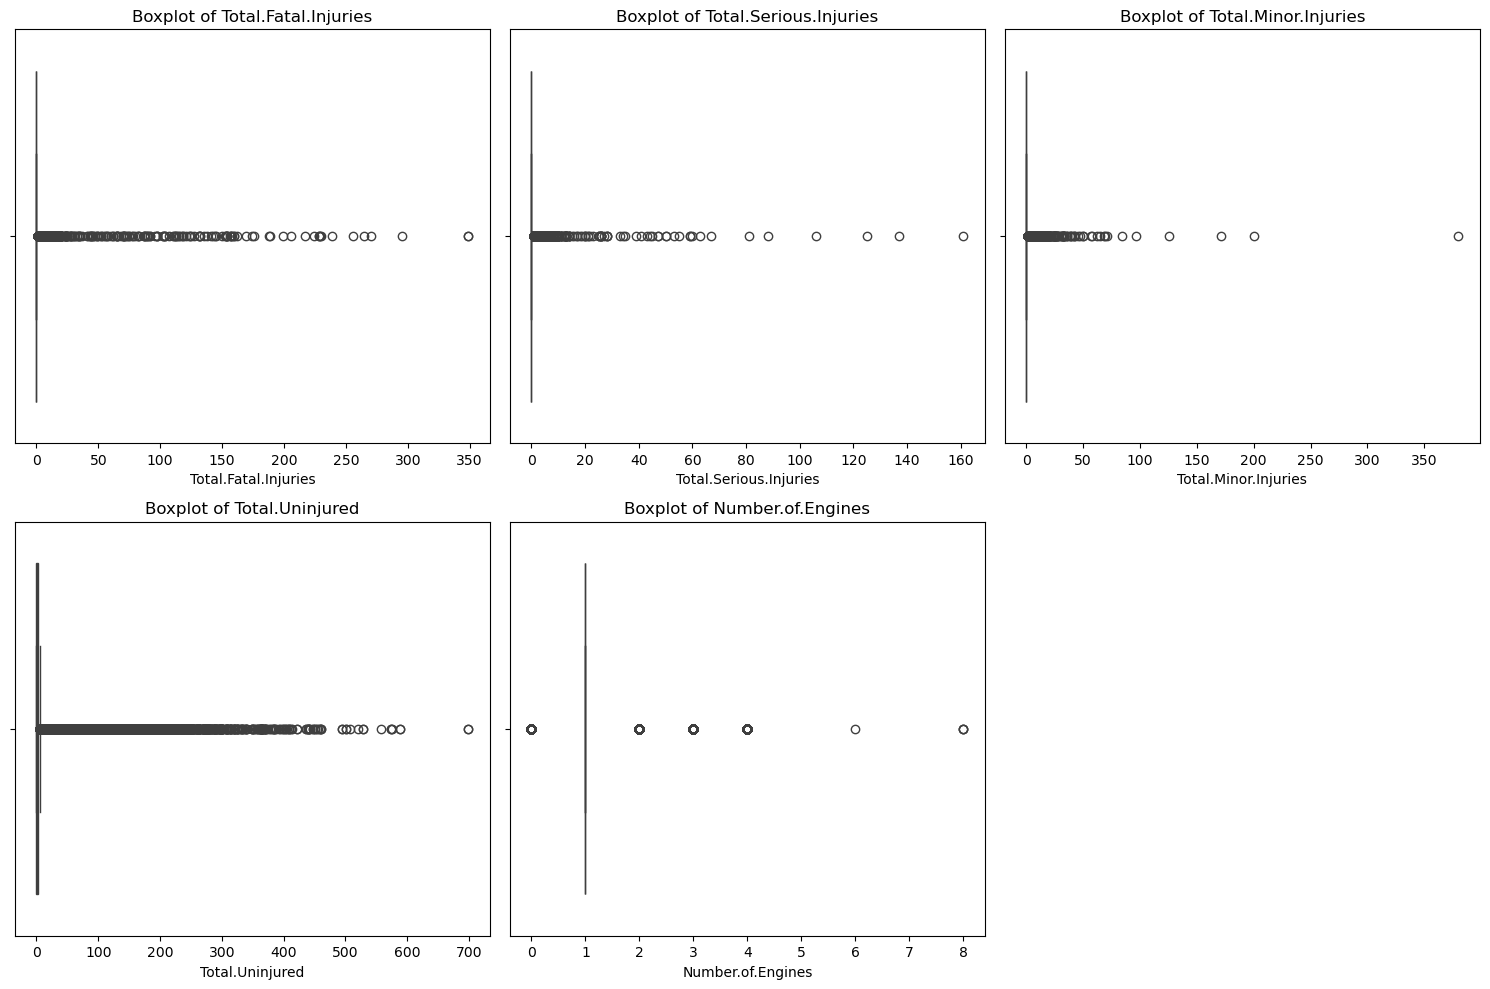

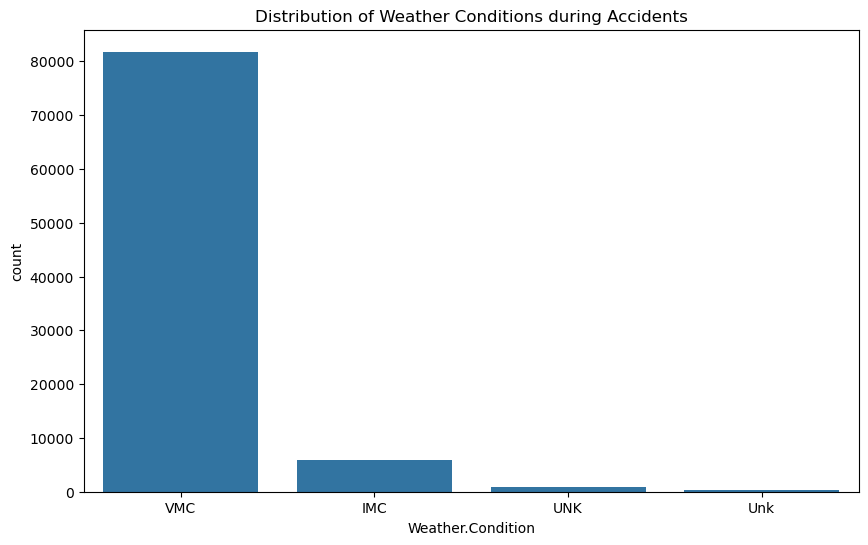

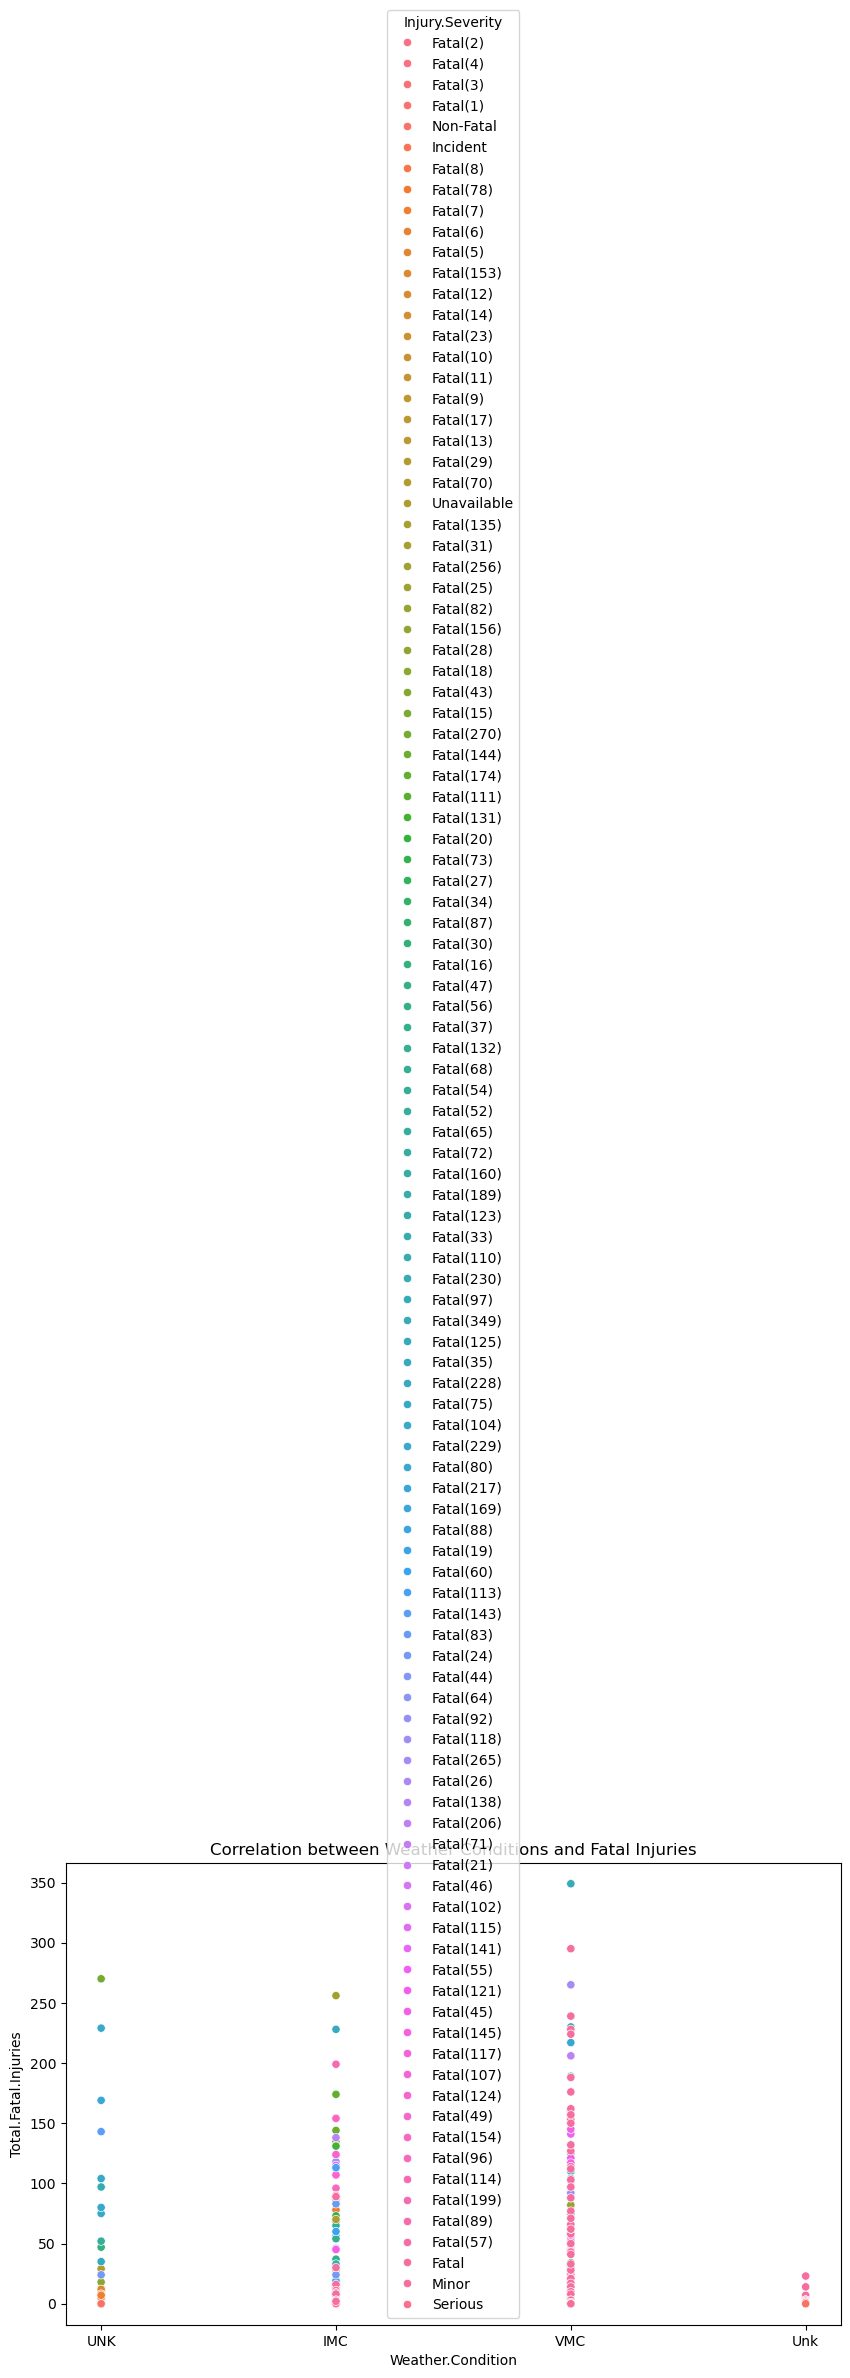

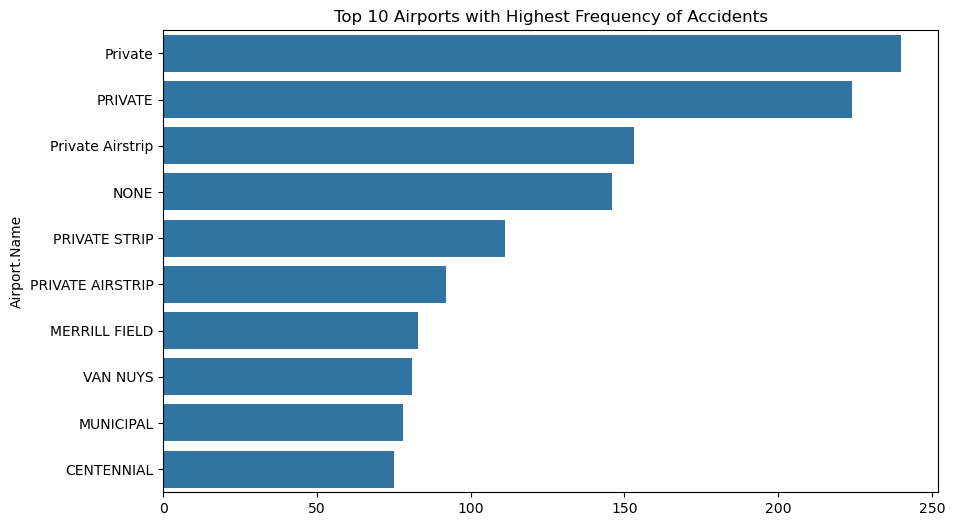

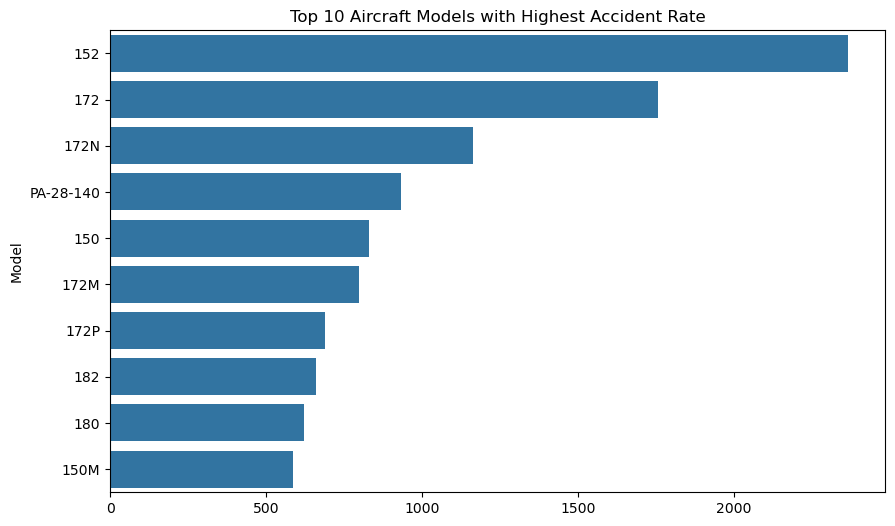

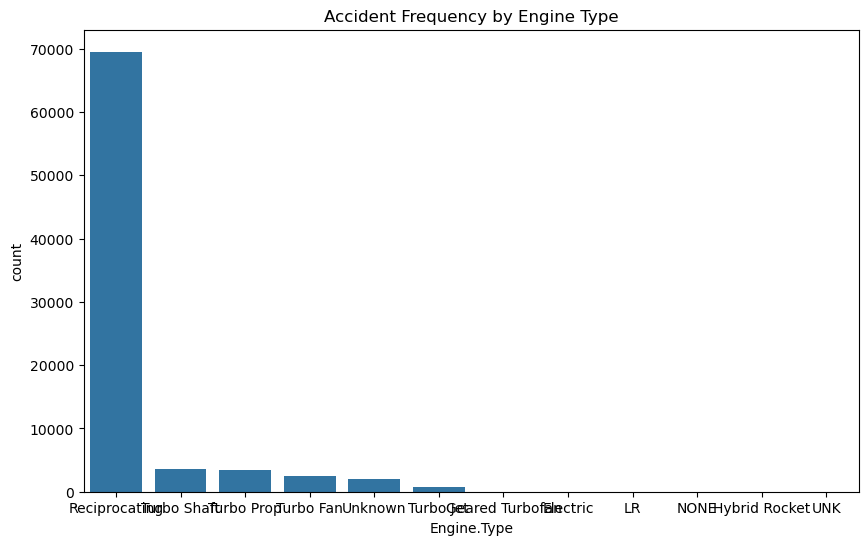

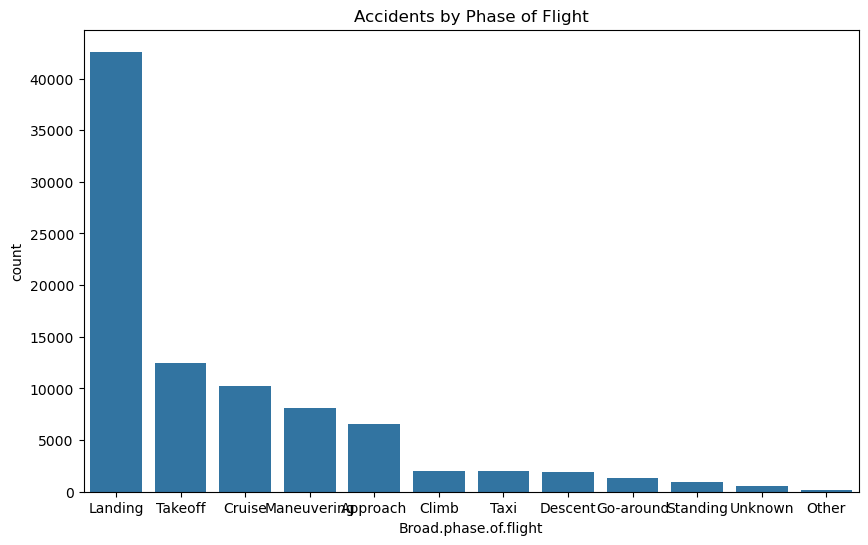

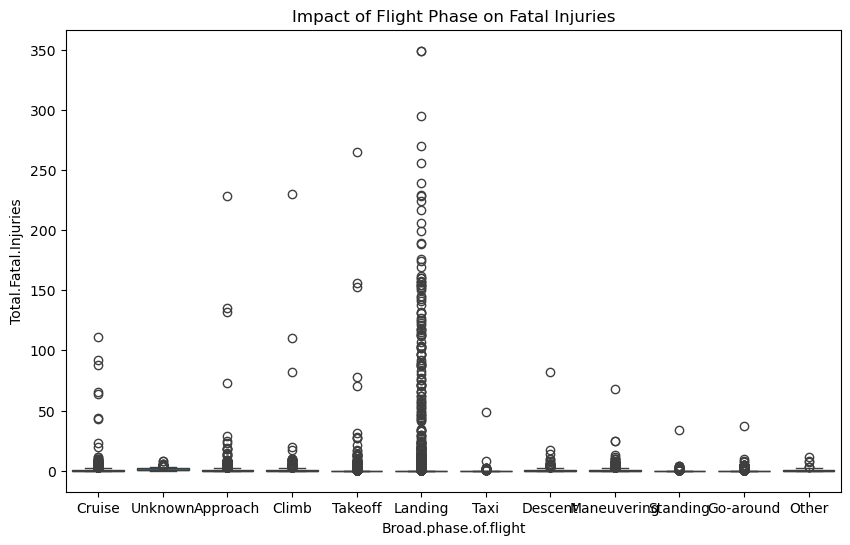

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
aviation_data_path = 'C:/Users/hp/Downloads/AviationData (1).csv'
state_codes_data_path = 'C:/Users/hp/Downloads/USState_Codes.csv'

# Read the datasets into pandas DataFrames
aviation_df = pd.read_csv(aviation_data_path)
state_codes_df = pd.read_csv(state_codes_data_path)

# Data Loading and Initial Exploration
# Display the first few rows of the aviation dataset
print(aviation_df.head())

# Display the summary of the dataset using .info() and .describe() methods
print(aviation_df.info())
print(aviation_df.describe(include='all'))

# Display the first few rows of the state codes dataset
print(state_codes_df.head())

# Data Cleaning
# Convert Event.Date to datetime format
aviation_df['Event.Date'] = pd.to_datetime(aviation_df['Event.Date'], errors='coerce')

# Check for missing values by calculating the percentage of missing data in each column
missing_values = aviation_df.isnull().mean() * 100
print(missing_values)

# Impute missing values for numeric columns with the median
aviation_df = aviation_df.assign(
    Number_of_Engines=aviation_df['Number.of.Engines'].fillna(aviation_df['Number.of.Engines'].median()),
    Total_Fatal_Injuries=aviation_df['Total.Fatal.Injuries'].fillna(aviation_df['Total.Fatal.Injuries'].median()),
    Total_Serious_Injuries=aviation_df['Total.Serious.Injuries'].fillna(aviation_df['Total.Serious.Injuries'].median()),
    Total_Minor_Injuries=aviation_df['Total.Minor.Injuries'].fillna(aviation_df['Total.Minor.Injuries'].median()),
    Total_Uninjured=aviation_df['Total.Uninjured'].fillna(aviation_df['Total.Uninjured'].median())
)

# For categorical columns, use mode for imputation
categorical_cols = ['Weather.Condition', 'Broad.phase.of.flight', 'Injury.Severity', 'Aircraft.damage']
for col in categorical_cols:
    aviation_df[col] = aviation_df[col].fillna(aviation_df[col].mode()[0])

# Drop columns with too many missing values or irrelevant columns
columns_to_drop = ['Latitude', 'Longitude', 'Publication.Date', 'Aircraft.Category', 'Schedule', 'FAR.Description']
aviation_df = aviation_df.drop(columns=columns_to_drop)

# Check data types after cleaning
print(aviation_df.info())

# Feature Engineering: Extract year from Event.Date
aviation_df['Event.Year'] = aviation_df['Event.Date'].dt.year

# Check for new features and the first few rows to ensure proper extraction
print(aviation_df[['Event.Date', 'Event.Year']].head())

# Check the distribution of the newly created Event.Year
year_distribution = aviation_df['Event.Year'].value_counts().sort_index()
print(year_distribution)

# Data Preprocessing
# Identify outliers using boxplots for numeric columns
plt.figure(figsize=(15, 10))
numeric_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Number.of.Engines']
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=aviation_df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Exploratory Data Analysis (EDA) and Visualization
# Q1. Weather Conditions: What weather conditions are most commonly associated with accidents or incidents?
plt.figure(figsize=(10, 6))
sns.countplot(data=aviation_df, x='Weather.Condition', order=aviation_df['Weather.Condition'].value_counts().index)
plt.title('Distribution of Weather Conditions during Accidents')
plt.show()

# Q2. Correlation between Weather and Severity: Is there a correlation between severe weather and severity of injuries?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=aviation_df, x='Weather.Condition', y='Total.Fatal.Injuries', hue='Injury.Severity')
plt.title('Correlation between Weather Conditions and Fatal Injuries')
plt.show()

# Q3. Airport Analysis: Are certain airports associated with a higher frequency of accidents?
plt.figure(figsize=(10, 6))
top_airports = aviation_df['Airport.Name'].value_counts().nlargest(10)
sns.barplot(x=top_airports.values, y=top_airports.index)
plt.title('Top 10 Airports with Highest Frequency of Accidents')
plt.show()

# Q4. Aircraft Models: Which aircraft models have the highest rate of accidents or incidents?
plt.figure(figsize=(10, 6))
top_models = aviation_df['Model'].value_counts().nlargest(10)
sns.barplot(x=top_models.values, y=top_models.index)
plt.title('Top 10 Aircraft Models with Highest Accident Rate')
plt.show()

# Q5. Engine Type Analysis: Is there a particular engine type more frequently involved in accidents?
plt.figure(figsize=(10, 6))
sns.countplot(data=aviation_df, x='Engine.Type', order=aviation_df['Engine.Type'].value_counts().index)
plt.title('Accident Frequency by Engine Type')
plt.show()

# Q6. Phase of Flight: During which phase of flight do most accidents occur, and what are the common causes?
plt.figure(figsize=(10, 6))
sns.countplot(data=aviation_df, x='Broad.phase.of.flight', order=aviation_df['Broad.phase.of.flight'].value_counts().index)
plt.title('Accidents by Phase of Flight')
plt.show()

# Q7. Impact of Flight Phase on Severity: How does the broad phase of flight impact injury severity or aircraft damage?
plt.figure(figsize=(10, 6))
sns.boxplot(data=aviation_df, x='Broad.phase.of.flight', y='Total.Fatal.Injuries')
plt.title('Impact of Flight Phase on Fatal Injuries')
plt.show()

# Q8. Factors Associated with Fatality Rates: What factors are most associated with higher fatality rates?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=aviation_df, x='Number.of.Engines', y='Total.Fatal.Injuries', hue='Make')
plt.title('Fatality Rates by Number of Engines and Aircraft Make')
plt.show()

# Q9. Engine Count and Survival Likelihood: Does the number of engines influence the likelihood of survival?
plt.figure(figsize=(10, 6))
sns.boxplot(data=aviation_df, x='Number.of.Engines', y='Total.Uninjured')
plt.title('Survival Rates by Engine Count')
plt.show()

# Q10. Injury Analysis Across Locations: How does the total number of injuries vary across different countries?
plt.figure(figsize=(10, 6))
top_countries = aviation_df['Country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Total Number of Injuries by Country')
plt.show()
